# LAB 1 
**Shreya Akurathi - 200968188**

# Metadata of dataset

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


TL;DR

Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)

***Q1.Find the number of classes***


*According to metadata there are 10 classes*

In [94]:
#import essential libraries
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.metrics import confusion_matrix

In [89]:
mnist= tf.keras.datasets.fashion_mnist

In [90]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [91]:
x_train[0].shape

(28, 28)

***Q2.Find dimensions of each image:***
*28x28*

***Q3. Display one image from each class***

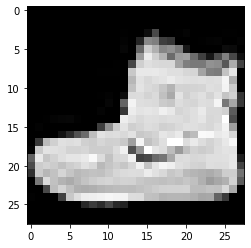

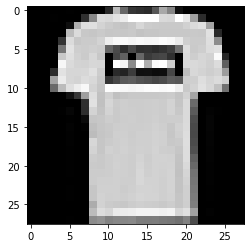

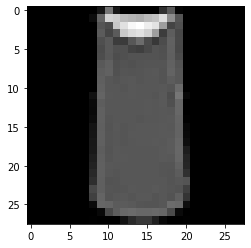

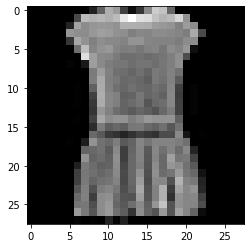

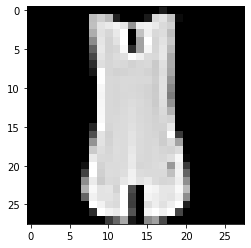

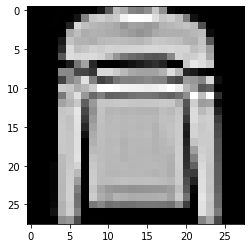

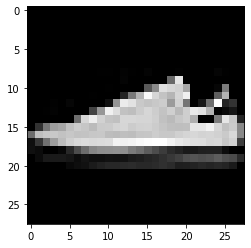

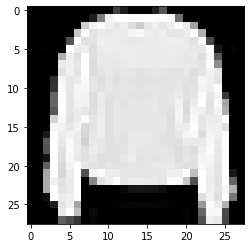

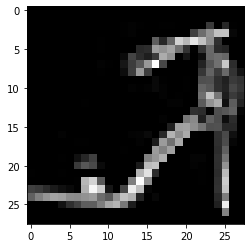

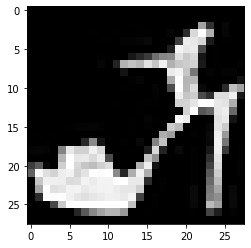

In [92]:
for i in range(10):
   plt.imshow(x_train[i],cmap="gray") 
   plt.show()

***Q4. Perform normalisation***

In [93]:
#normalisation 
x_train= x_train/255
x_test= x_test/255

***Q5. Build 2 neural networks with 2 hidden layers and 5 hidden layers***

# 2 layers

In [46]:
model = tf.keras.Sequential()

In [47]:

model.add(tf.keras.layers.Flatten(input_shape= [28,28],name="inputlayer"))
model.add(tf.keras.layers.Dense(300, activation="relu", name="hiddenlayer1"))
model.add(tf.keras.layers.Dense(100, activation="relu", name="hiddenlayer2"))
model.add(tf.keras.layers.Dense(10, activation="softmax", name="outputlayer"))

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

In [50]:
##Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [51]:
history = model.fit(x_train,
    y_train,
    batch_size=32,
    epochs=1000,
    validation_split=0.1,
    callbacks= early_stopping)

Epoch 1/1000
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4786 - accuracy: 0.8279 - val_loss: 0.3734 - val_accuracy: 0.8635
Epoch 2/1000
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3604 - accuracy: 0.8668 - val_loss: 0.3726 - val_accuracy: 0.8657
Epoch 3/1000
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3261 - accuracy: 0.8796 - val_loss: 0.3891 - val_accuracy: 0.8618
Epoch 4/1000
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3041 - accuracy: 0.8880 - val_loss: 0.3274 - val_accuracy: 0.8777
Epoch 5/1000
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2844 - accuracy: 0.8951 - val_loss: 0.3489 - val_accuracy: 0.8783
Epoch 6/1000
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2720 - accuracy: 0.8985 - val_loss: 0.3288 - val_accuracy: 0.8842
Epoch 7/1000
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2569 - accuracy: 0.9025 - val_loss: 0.3179 -

Best Validation Loss: 0.3125
Best Validation Accuracy: 0.8942


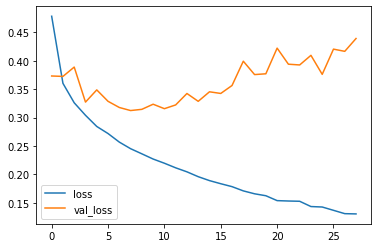

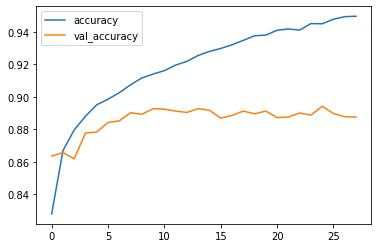

In [52]:
history_df = pd.DataFrame(history.history)

history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

In [81]:
y_predict = model.predict(x_test)
y_predict=np.argmax(y_predict, axis=1)

# 5 layer

In [53]:
model1 = tf.keras.Sequential()

In [56]:

model1.add(tf.keras.layers.Flatten(input_shape= [28,28],name="inputlayer"))

model1.add(tf.keras.layers.Dense(400, activation="relu", name="hiddenlayer1"))
model1.add(tf.keras.layers.Dense(150, activation="relu", name="hiddenlayer2"))
model1.add(tf.keras.layers.Dense(80, activation="relu", name="hiddenlayer3"))
model1.add(tf.keras.layers.Dense(40, activation="relu", name="hiddenlayer4"))
model1.add(tf.keras.layers.Dense(15, activation="relu", name="hiddenlayer5"))

model1.add(tf.keras.layers.Dense(10, activation="softmax", name="outputlayer"))

In [57]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 400)               314000    
                                                                 
 hiddenlayer2 (Dense)        (None, 150)               60150     
                                                                 
 hiddenlayer3 (Dense)        (None, 80)                12080     
                                                                 
 hiddenlayer4 (Dense)        (None, 40)                3240      
                                                                 
 hiddenlayer5 (Dense)        (None, 15)                615       
                                                                 
 outputlayer (Dense)         (None, 10)               

In [59]:
model1.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

In [60]:
##Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [62]:
history1 = model1.fit(x_train,
    y_train,
    batch_size=32,
    epochs=1000,
    validation_split=0.1,
    callbacks= early_stopping)

Epoch 1/1000
1688/1688 [==============================] - 10s 6ms/step - loss: 0.5330 - accuracy: 0.8082 - val_loss: 0.4102 - val_accuracy: 0.8582
Epoch 2/1000
1688/1688 [==============================] - 9s 6ms/step - loss: 0.3808 - accuracy: 0.8609 - val_loss: 0.3708 - val_accuracy: 0.8675
Epoch 3/1000
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3415 - accuracy: 0.8760 - val_loss: 0.3516 - val_accuracy: 0.8685
Epoch 4/1000
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3158 - accuracy: 0.8822 - val_loss: 0.3374 - val_accuracy: 0.8743
Epoch 5/1000
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2996 - accuracy: 0.8896 - val_loss: 0.3551 - val_accuracy: 0.8718
Epoch 6/1000
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2820 - accuracy: 0.8947 - val_loss: 0.3224 - val_accuracy: 0.8857
Epoch 7/1000
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2696 - accuracy: 0.8993 - val_loss: 0.3273 

Best Validation Loss: 0.3140
Best Validation Accuracy: 0.8967


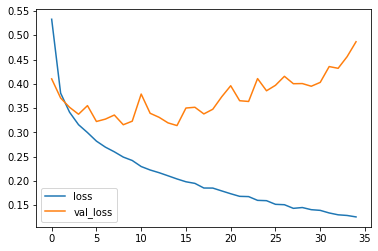

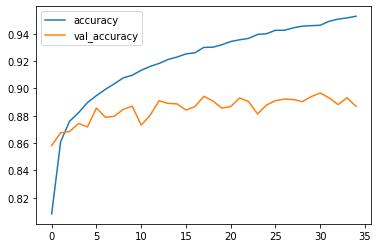

In [63]:
history1_df = pd.DataFrame(history1.history)

history1_df.loc[0:, ['loss', 'val_loss']].plot()
history1_df.loc[0:, ['accuracy', 'val_accuracy']].plot()
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history1_df['val_loss'].min(), 
              history1_df['val_accuracy'].max()))

In [84]:
y_predict1 = model1.predict(x_test)
y_predict1=np.argmax(y_predict1, axis=1)

# Compare their performance

In [85]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("\n Accuracy of ANN model with 2 layers:",test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.4895 - accuracy: 0.8911

 Accuracy of ANN model with 2 layers: 0.8910999894142151


In [86]:
test_loss1, test_accuracy1 = model1.evaluate(x_test, y_test)
print("\n Accuracy of ANN model with 5 layers:",test_accuracy1)

313/313 [==============================] - 1s 4ms/step - loss: 0.4766 - accuracy: 0.8887

 Accuracy of ANN model with 5 layers: 0.888700008392334


*USING CONFUSION MATRIX SINCE IT IS A CLASSIFICATION PROBLEM*

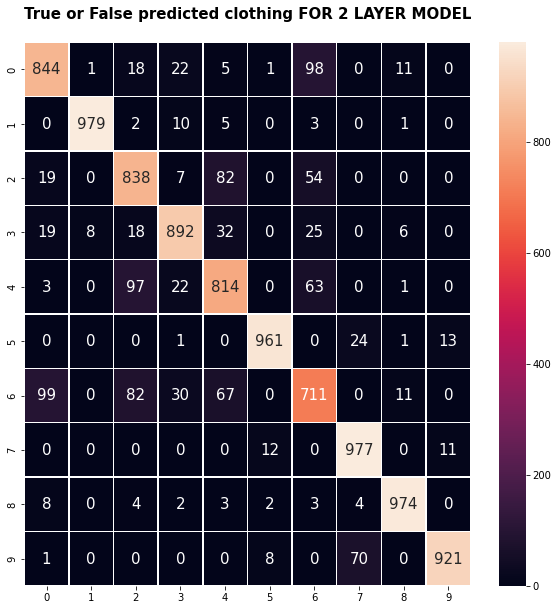

In [95]:
con_mat=confusion_matrix(y_test,y_predict)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sb.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d")
plt.title('True or False predicted clothing FOR 2 LAYER MODEL\n',fontweight='bold',fontsize=15)
plt.show()

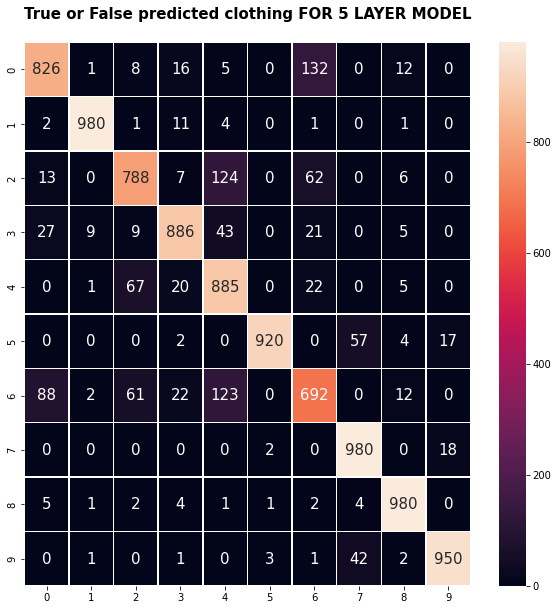

In [96]:
con_mat=confusion_matrix(y_test,y_predict1)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sb.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d")
plt.title('True or False predicted clothing FOR 5 LAYER MODEL\n',fontweight='bold',fontsize=15)
plt.show()

**AS YOU CAN SEE THERE IS NOT MUCH OF A DIFFERNCE BETWEEN THE 2 LAYER AND 5 LAYER MODEL, WE COULD TRY TUNING THE HYPERPARAMETERS FURTHER USING THE KERAS TUNER TO GET ACCURACY LEVELS TO AROUND 95% EVEN. BUT THE FACT STILL REMAINS THAT DESPITE THE INCREASED NUMBER OF LAYERS, THE ACCURACY, LOSS AND THE NUMBER OF TRUE/FALSE POSTIVES/NEGETIVES REMAINED CONSISTENT ACROSS EPOCHS USING EARLY STOPPING.**